In [13]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [12]:
#Import the dataset
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [14]:
#Divide the dataset into features and target
X = diabetes_data.data
y = diabetes_data.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

In [6]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [7]:
# Print the Mean Squared Error for both models
print(f'Ridge Regression Mean Squared Error: {ridge_mse:.2f}')
print(f'Lasso Regression Mean Squared Error: {lasso_mse:.2f}')

Ridge Regression Mean Squared Error: 3077.42
Lasso Regression Mean Squared Error: 3403.58


In [11]:
# Print the coefficients for both models
print(f'Ridge Regression coefficients: {ridge.coef_}')
print(f'Lasso Regression coefficients: {lasso.coef_}')

Ridge Regression coefficients: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
Lasso Regression coefficients: [  0.          -0.         413.43184792  34.83051518   0.
   0.          -0.           0.         258.15289363   0.        ]


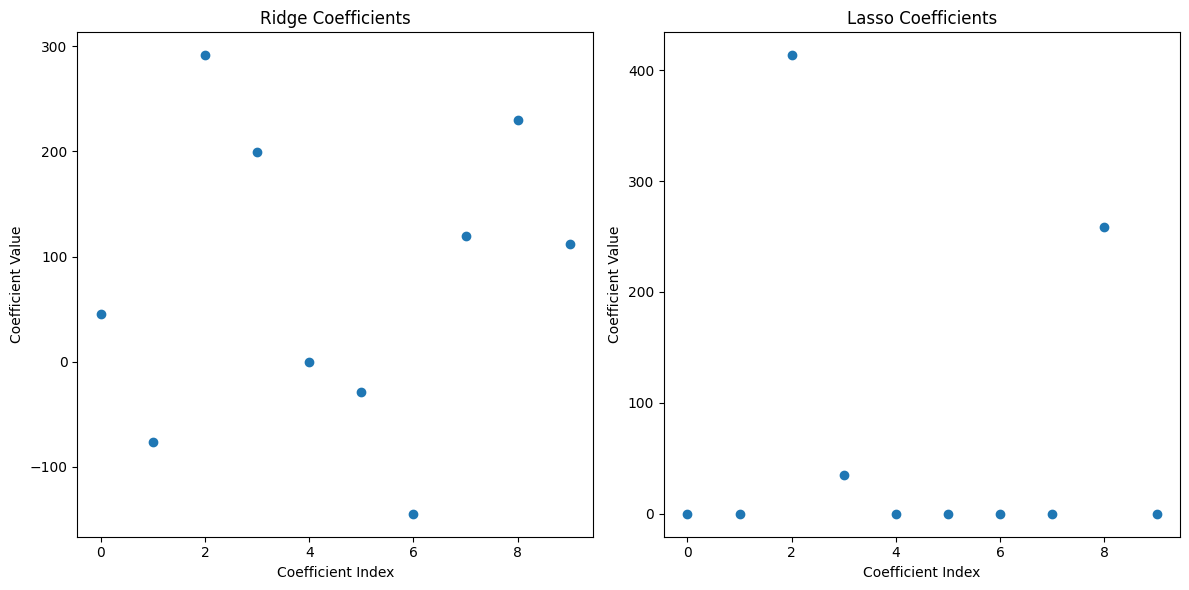

In [10]:
# Plotting the coefficients for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ridge.coef_, marker='o', linestyle='none')
plt.title('Ridge Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.plot(lasso.coef_, marker='o', linestyle='none')
plt.title('Lasso Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()